# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 2:
Image - Min Value: 2 Max Value: 204
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


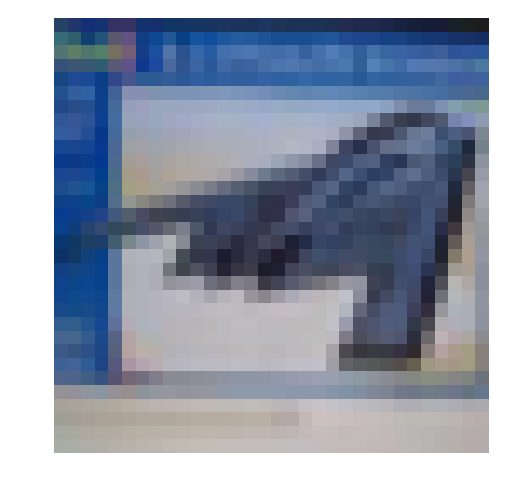

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 4
sample_id = 2
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # return None
    a = 0
    b = 255
    return (x-a)/(b-a)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # return None
    y = np.zeros((len(x), 10))
    for i in range(len(x)):
        y[i,x[i]] = 1
    return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

# Network Parameters
#n_input = 3072 # MNIST data input (img shape: 28*28)
#n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    # return None
    #print(image_shape)    
    # return tf.placeholder(tf.float32, shape=(32, 32, 3))
    return tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], image_shape[2]], name='x')

def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    #print(n_classes)
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, None, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #print(x_tensor)
    input_channel_depth = int(x_tensor.get_shape()[3])
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    filter_weights = tf.Variable(tf.truncated_normal([*conv_ksize, input_channel_depth, conv_num_outputs], dtype=tf.float32))
    # The shape of the biases is equal the the number of outputs of the conv layer
    filter_biases = tf.Variable(tf.constant(0, shape=[conv_num_outputs], dtype=tf.float32))
    
    layer = tf.nn.conv2d(input=x_tensor, filter=filter_weights, strides=[1, *conv_strides, 1], padding='SAME')
    layer += filter_biases
    layer = tf.nn.max_pool(layer, [1, *pool_ksize, 1], strides=[1, *pool_strides, 1], padding='SAME')
    return layer 
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
from numpy import prod
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    batch_size = x_tensor.get_shape()[0]
    #flattened_image_size = x_tensor.get_shape()[1]*x_tensor.get_shape()[2]*x_tensor.get_shape()[3]
    #print(flattened_image_size)
    #return tf.contrib.layers.flatten(x_tensor,[batch_size,flattened_image_size])
    #return tf.reshape(x_tensor, [batch_size,flattened_image_size])
    dimension = x_tensor.get_shape().as_list()    
    #print(prod(dimension[1:]))
    return tf.reshape(x_tensor,[-1,prod(dimension[1:])])
   

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # return None
    #print(x_tensor)
    #print(num_outputs)
    shape = x_tensor.get_shape().as_list()[1:]
    shape.append(num_outputs)
    #print(shape)
    weight = tf.Variable(tf.truncated_normal(shape,0,0.1))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.add(tf.matmul(x_tensor,weight), bias))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #return None
    shape = x_tensor.get_shape().as_list()[1:]
    shape.append(num_outputs)
    #print(shape)
    weight = tf.Variable(tf.truncated_normal(shape,0,0.01))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.add(tf.matmul(x_tensor,weight), bias))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [31]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    #print(x)
    x_tensor = x
    conv_num_outputs = 10
    conv_ksize = (4, 4)
    conv_strides = (1, 1)
    pool_ksize = (8, 8)
    pool_strides = (1, 1)
    
    model = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Apply some dropout
    model = tf.nn.dropout(model, keep_prob)
    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    model = flatten(model)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    num_outputs = 10 
    model = fully_conn(model, num_outputs)
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    model = output(model, num_outputs)
    
    
    # TODO: return output
    return model


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [32]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_probability})



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [33]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    #pass
    # Loss and Optimizer
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    #optimizer = tf.train.AdamOptimizer().minimize(cost)

    # Accuracy
    #correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    #accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    #print(cost, accuracy)
    loss = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0})
    valid_acc = sess.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                loss,
                valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [34]:
# TODO: Tune Parameters
epochs = 200
batch_size = 256
keep_probability = 0.60

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.1120 Validation Accuracy: 0.292400
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.0712 Validation Accuracy: 0.340400
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.0060 Validation Accuracy: 0.346000
Epoch  4, CIFAR-10 Batch 1:  Loss:     1.9459 Validation Accuracy: 0.360200
Epoch  5, CIFAR-10 Batch 1:  Loss:     1.8902 Validation Accuracy: 0.370400
Epoch  6, CIFAR-10 Batch 1:  Loss:     1.8147 Validation Accuracy: 0.376800
Epoch  7, CIFAR-10 Batch 1:  Loss:     1.7604 Validation Accuracy: 0.380600
Epoch  8, CIFAR-10 Batch 1:  Loss:     1.7066 Validation Accuracy: 0.390600
Epoch  9, CIFAR-10 Batch 1:  Loss:     1.6632 Validation Accuracy: 0.394600
Epoch 10, CIFAR-10 Batch 1:  Loss:     1.6340 Validation Accuracy: 0.398200
Epoch 11, CIFAR-10 Batch 1:  Loss:     1.5975 Validation Accuracy: 0.404200
Epoch 12, CIFAR-10 Batch 1:  Loss:     1.5644 Validation Accuracy: 0.407600
Epoch 13, CIFAR-10 Batch 1:  Loss:     1.5570

Epoch 109, CIFAR-10 Batch 1:  Loss:     0.9000 Validation Accuracy: 0.440200
Epoch 110, CIFAR-10 Batch 1:  Loss:     0.8794 Validation Accuracy: 0.437000
Epoch 111, CIFAR-10 Batch 1:  Loss:     0.8982 Validation Accuracy: 0.438800
Epoch 112, CIFAR-10 Batch 1:  Loss:     0.8780 Validation Accuracy: 0.441800
Epoch 113, CIFAR-10 Batch 1:  Loss:     0.8780 Validation Accuracy: 0.436600
Epoch 114, CIFAR-10 Batch 1:  Loss:     0.8910 Validation Accuracy: 0.432600
Epoch 115, CIFAR-10 Batch 1:  Loss:     0.8991 Validation Accuracy: 0.431800
Epoch 116, CIFAR-10 Batch 1:  Loss:     0.8849 Validation Accuracy: 0.445400
Epoch 117, CIFAR-10 Batch 1:  Loss:     0.8923 Validation Accuracy: 0.443000
Epoch 118, CIFAR-10 Batch 1:  Loss:     0.8818 Validation Accuracy: 0.437000
Epoch 119, CIFAR-10 Batch 1:  Loss:     0.8768 Validation Accuracy: 0.437000
Epoch 120, CIFAR-10 Batch 1:  Loss:     0.8748 Validation Accuracy: 0.439600
Epoch 121, CIFAR-10 Batch 1:  Loss:     0.8783 Validation Accuracy: 0.436400

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.3026 Validation Accuracy: 0.098200
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.1965 Validation Accuracy: 0.094200
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.2756 Validation Accuracy: 0.151200
Epoch  1, CIFAR-10 Batch 4:  Loss:     2.1720 Validation Accuracy: 0.107200
Epoch  1, CIFAR-10 Batch 5:  Loss:     2.2767 Validation Accuracy: 0.154400
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.2267 Validation Accuracy: 0.116800
Epoch  2, CIFAR-10 Batch 2:  Loss:     2.1643 Validation Accuracy: 0.115000
Epoch  2, CIFAR-10 Batch 3:  Loss:     2.1767 Validation Accuracy: 0.111800
Epoch  2, CIFAR-10 Batch 4:  Loss:     2.1587 Validation Accuracy: 0.112600
Epoch  2, CIFAR-10 Batch 5:  Loss:     2.2750 Validation Accuracy: 0.155600
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.1919 Validation Accuracy: 0.105800
Epoch  3, CIFAR-10 Batch 2:  Loss:     2.1580 Validation Accuracy: 0.121400
Epoch  3, CIFAR-10 Batch 3:  Loss:     2.1366 Validation Accuracy: 0.117400


Epoch 22, CIFAR-10 Batch 4:  Loss:     1.0510 Validation Accuracy: 0.569000
Epoch 22, CIFAR-10 Batch 5:  Loss:     1.0076 Validation Accuracy: 0.571800
Epoch 23, CIFAR-10 Batch 1:  Loss:     1.0660 Validation Accuracy: 0.569400
Epoch 23, CIFAR-10 Batch 2:  Loss:     0.9788 Validation Accuracy: 0.564000
Epoch 23, CIFAR-10 Batch 3:  Loss:     0.8645 Validation Accuracy: 0.567000
Epoch 23, CIFAR-10 Batch 4:  Loss:     1.0152 Validation Accuracy: 0.567800
Epoch 23, CIFAR-10 Batch 5:  Loss:     0.9919 Validation Accuracy: 0.575400
Epoch 24, CIFAR-10 Batch 1:  Loss:     1.0432 Validation Accuracy: 0.577000
Epoch 24, CIFAR-10 Batch 2:  Loss:     0.9587 Validation Accuracy: 0.568000
Epoch 24, CIFAR-10 Batch 3:  Loss:     0.8502 Validation Accuracy: 0.574800
Epoch 24, CIFAR-10 Batch 4:  Loss:     1.0141 Validation Accuracy: 0.573200
Epoch 24, CIFAR-10 Batch 5:  Loss:     0.9808 Validation Accuracy: 0.576200
Epoch 25, CIFAR-10 Batch 1:  Loss:     0.9964 Validation Accuracy: 0.578800
Epoch 25, CI

Epoch 44, CIFAR-10 Batch 2:  Loss:     0.7891 Validation Accuracy: 0.604800
Epoch 44, CIFAR-10 Batch 3:  Loss:     0.6692 Validation Accuracy: 0.605800
Epoch 44, CIFAR-10 Batch 4:  Loss:     0.7398 Validation Accuracy: 0.607800
Epoch 44, CIFAR-10 Batch 5:  Loss:     0.7224 Validation Accuracy: 0.602400
Epoch 45, CIFAR-10 Batch 1:  Loss:     0.8498 Validation Accuracy: 0.605400
Epoch 45, CIFAR-10 Batch 2:  Loss:     0.7835 Validation Accuracy: 0.605200
Epoch 45, CIFAR-10 Batch 3:  Loss:     0.6695 Validation Accuracy: 0.605200
Epoch 45, CIFAR-10 Batch 4:  Loss:     0.7359 Validation Accuracy: 0.602600
Epoch 45, CIFAR-10 Batch 5:  Loss:     0.7270 Validation Accuracy: 0.603000
Epoch 46, CIFAR-10 Batch 1:  Loss:     0.8511 Validation Accuracy: 0.605600
Epoch 46, CIFAR-10 Batch 2:  Loss:     0.8038 Validation Accuracy: 0.611000
Epoch 46, CIFAR-10 Batch 3:  Loss:     0.6548 Validation Accuracy: 0.613400
Epoch 46, CIFAR-10 Batch 4:  Loss:     0.7253 Validation Accuracy: 0.608200
Epoch 46, CI

Epoch 65, CIFAR-10 Batch 5:  Loss:     0.6412 Validation Accuracy: 0.606400
Epoch 66, CIFAR-10 Batch 1:  Loss:     0.7447 Validation Accuracy: 0.608600
Epoch 66, CIFAR-10 Batch 2:  Loss:     0.7358 Validation Accuracy: 0.617200
Epoch 66, CIFAR-10 Batch 3:  Loss:     0.5842 Validation Accuracy: 0.613600
Epoch 66, CIFAR-10 Batch 4:  Loss:     0.6314 Validation Accuracy: 0.611200
Epoch 66, CIFAR-10 Batch 5:  Loss:     0.6447 Validation Accuracy: 0.608000
Epoch 67, CIFAR-10 Batch 1:  Loss:     0.7592 Validation Accuracy: 0.613600
Epoch 67, CIFAR-10 Batch 2:  Loss:     0.7092 Validation Accuracy: 0.615200
Epoch 67, CIFAR-10 Batch 3:  Loss:     0.5854 Validation Accuracy: 0.618400
Epoch 67, CIFAR-10 Batch 4:  Loss:     0.6244 Validation Accuracy: 0.612600
Epoch 67, CIFAR-10 Batch 5:  Loss:     0.6327 Validation Accuracy: 0.614600
Epoch 68, CIFAR-10 Batch 1:  Loss:     0.7381 Validation Accuracy: 0.611400
Epoch 68, CIFAR-10 Batch 2:  Loss:     0.7199 Validation Accuracy: 0.615000
Epoch 68, CI

Epoch 87, CIFAR-10 Batch 3:  Loss:     0.5251 Validation Accuracy: 0.620800
Epoch 87, CIFAR-10 Batch 4:  Loss:     0.5694 Validation Accuracy: 0.614600
Epoch 87, CIFAR-10 Batch 5:  Loss:     0.5761 Validation Accuracy: 0.608000
Epoch 88, CIFAR-10 Batch 1:  Loss:     0.6803 Validation Accuracy: 0.615400
Epoch 88, CIFAR-10 Batch 2:  Loss:     0.6634 Validation Accuracy: 0.616200
Epoch 88, CIFAR-10 Batch 3:  Loss:     0.5277 Validation Accuracy: 0.619800
Epoch 88, CIFAR-10 Batch 4:  Loss:     0.5848 Validation Accuracy: 0.617000
Epoch 88, CIFAR-10 Batch 5:  Loss:     0.5693 Validation Accuracy: 0.610800
Epoch 89, CIFAR-10 Batch 1:  Loss:     0.6929 Validation Accuracy: 0.616600
Epoch 89, CIFAR-10 Batch 2:  Loss:     0.6557 Validation Accuracy: 0.619600
Epoch 89, CIFAR-10 Batch 3:  Loss:     0.5182 Validation Accuracy: 0.616600
Epoch 89, CIFAR-10 Batch 4:  Loss:     0.5614 Validation Accuracy: 0.618000
Epoch 89, CIFAR-10 Batch 5:  Loss:     0.5724 Validation Accuracy: 0.613200
Epoch 90, CI

Epoch 109, CIFAR-10 Batch 1:  Loss:     0.6556 Validation Accuracy: 0.616400
Epoch 109, CIFAR-10 Batch 2:  Loss:     0.6308 Validation Accuracy: 0.620600
Epoch 109, CIFAR-10 Batch 3:  Loss:     0.4695 Validation Accuracy: 0.623400
Epoch 109, CIFAR-10 Batch 4:  Loss:     0.5421 Validation Accuracy: 0.621600
Epoch 109, CIFAR-10 Batch 5:  Loss:     0.5462 Validation Accuracy: 0.613200
Epoch 110, CIFAR-10 Batch 1:  Loss:     0.6505 Validation Accuracy: 0.618000
Epoch 110, CIFAR-10 Batch 2:  Loss:     0.6227 Validation Accuracy: 0.624000
Epoch 110, CIFAR-10 Batch 3:  Loss:     0.4716 Validation Accuracy: 0.623200
Epoch 110, CIFAR-10 Batch 4:  Loss:     0.5391 Validation Accuracy: 0.619000
Epoch 110, CIFAR-10 Batch 5:  Loss:     0.5526 Validation Accuracy: 0.613600
Epoch 111, CIFAR-10 Batch 1:  Loss:     0.6613 Validation Accuracy: 0.617800
Epoch 111, CIFAR-10 Batch 2:  Loss:     0.6153 Validation Accuracy: 0.622400
Epoch 111, CIFAR-10 Batch 3:  Loss:     0.4996 Validation Accuracy: 0.620800

Epoch 130, CIFAR-10 Batch 3:  Loss:     0.4668 Validation Accuracy: 0.624800
Epoch 130, CIFAR-10 Batch 4:  Loss:     0.5210 Validation Accuracy: 0.618200
Epoch 130, CIFAR-10 Batch 5:  Loss:     0.5225 Validation Accuracy: 0.616800
Epoch 131, CIFAR-10 Batch 1:  Loss:     0.6362 Validation Accuracy: 0.624000
Epoch 131, CIFAR-10 Batch 2:  Loss:     0.6030 Validation Accuracy: 0.625800
Epoch 131, CIFAR-10 Batch 3:  Loss:     0.4397 Validation Accuracy: 0.628000
Epoch 131, CIFAR-10 Batch 4:  Loss:     0.4909 Validation Accuracy: 0.622400
Epoch 131, CIFAR-10 Batch 5:  Loss:     0.5123 Validation Accuracy: 0.619800
Epoch 132, CIFAR-10 Batch 1:  Loss:     0.6275 Validation Accuracy: 0.620000
Epoch 132, CIFAR-10 Batch 2:  Loss:     0.5982 Validation Accuracy: 0.622800
Epoch 132, CIFAR-10 Batch 3:  Loss:     0.4498 Validation Accuracy: 0.625200
Epoch 132, CIFAR-10 Batch 4:  Loss:     0.4967 Validation Accuracy: 0.622000
Epoch 132, CIFAR-10 Batch 5:  Loss:     0.4952 Validation Accuracy: 0.617000

Epoch 151, CIFAR-10 Batch 5:  Loss:     0.4703 Validation Accuracy: 0.622200
Epoch 152, CIFAR-10 Batch 1:  Loss:     0.6076 Validation Accuracy: 0.619800
Epoch 152, CIFAR-10 Batch 2:  Loss:     0.5862 Validation Accuracy: 0.626800
Epoch 152, CIFAR-10 Batch 3:  Loss:     0.4262 Validation Accuracy: 0.625400
Epoch 152, CIFAR-10 Batch 4:  Loss:     0.4881 Validation Accuracy: 0.622200
Epoch 152, CIFAR-10 Batch 5:  Loss:     0.4813 Validation Accuracy: 0.616400
Epoch 153, CIFAR-10 Batch 1:  Loss:     0.6141 Validation Accuracy: 0.621600
Epoch 153, CIFAR-10 Batch 2:  Loss:     0.5814 Validation Accuracy: 0.621000
Epoch 153, CIFAR-10 Batch 3:  Loss:     0.4262 Validation Accuracy: 0.624800
Epoch 153, CIFAR-10 Batch 4:  Loss:     0.5013 Validation Accuracy: 0.618800
Epoch 153, CIFAR-10 Batch 5:  Loss:     0.4800 Validation Accuracy: 0.618200
Epoch 154, CIFAR-10 Batch 1:  Loss:     0.6197 Validation Accuracy: 0.621600
Epoch 154, CIFAR-10 Batch 2:  Loss:     0.5671 Validation Accuracy: 0.626600

Epoch 173, CIFAR-10 Batch 2:  Loss:     0.5520 Validation Accuracy: 0.630000
Epoch 173, CIFAR-10 Batch 3:  Loss:     0.4181 Validation Accuracy: 0.628400
Epoch 173, CIFAR-10 Batch 4:  Loss:     0.5045 Validation Accuracy: 0.627200
Epoch 173, CIFAR-10 Batch 5:  Loss:     0.4641 Validation Accuracy: 0.623400
Epoch 174, CIFAR-10 Batch 1:  Loss:     0.6135 Validation Accuracy: 0.626200
Epoch 174, CIFAR-10 Batch 2:  Loss:     0.5538 Validation Accuracy: 0.628800
Epoch 174, CIFAR-10 Batch 3:  Loss:     0.4213 Validation Accuracy: 0.625800
Epoch 174, CIFAR-10 Batch 4:  Loss:     0.4931 Validation Accuracy: 0.622400
Epoch 174, CIFAR-10 Batch 5:  Loss:     0.4726 Validation Accuracy: 0.621800
Epoch 175, CIFAR-10 Batch 1:  Loss:     0.5929 Validation Accuracy: 0.625800
Epoch 175, CIFAR-10 Batch 2:  Loss:     0.5434 Validation Accuracy: 0.627800
Epoch 175, CIFAR-10 Batch 3:  Loss:     0.4226 Validation Accuracy: 0.625000
Epoch 175, CIFAR-10 Batch 4:  Loss:     0.4957 Validation Accuracy: 0.625200

Epoch 194, CIFAR-10 Batch 4:  Loss:     0.4728 Validation Accuracy: 0.625800
Epoch 194, CIFAR-10 Batch 5:  Loss:     0.4488 Validation Accuracy: 0.625600
Epoch 195, CIFAR-10 Batch 1:  Loss:     0.5850 Validation Accuracy: 0.625800
Epoch 195, CIFAR-10 Batch 2:  Loss:     0.5250 Validation Accuracy: 0.629000
Epoch 195, CIFAR-10 Batch 3:  Loss:     0.4134 Validation Accuracy: 0.625000
Epoch 195, CIFAR-10 Batch 4:  Loss:     0.4828 Validation Accuracy: 0.627200
Epoch 195, CIFAR-10 Batch 5:  Loss:     0.4480 Validation Accuracy: 0.624800
Epoch 196, CIFAR-10 Batch 1:  Loss:     0.5817 Validation Accuracy: 0.624800
Epoch 196, CIFAR-10 Batch 2:  Loss:     0.5289 Validation Accuracy: 0.626400
Epoch 196, CIFAR-10 Batch 3:  Loss:     0.4160 Validation Accuracy: 0.619800
Epoch 196, CIFAR-10 Batch 4:  Loss:     0.4834 Validation Accuracy: 0.627000
Epoch 196, CIFAR-10 Batch 5:  Loss:     0.4373 Validation Accuracy: 0.621600
Epoch 197, CIFAR-10 Batch 1:  Loss:     0.5896 Validation Accuracy: 0.627200

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

/output
INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.63046875



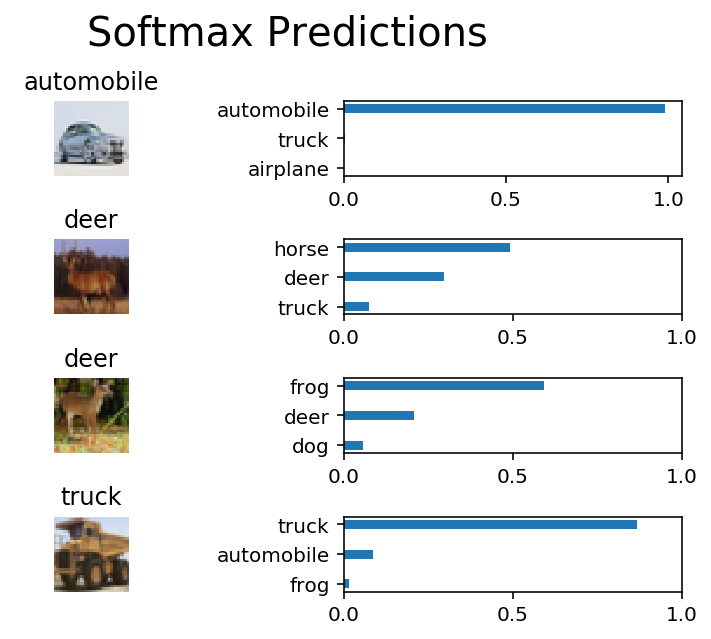

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

import os
print(os.getcwd())

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.